In [2]:
!pwd

/content


In [3]:
cd /content/drive/MyDrive

/content/drive/MyDrive


In [5]:
from google.colab import files
uploaded = files.upload()

Saving Churn_Modelling.csv to Churn_Modelling.csv


In [8]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [9]:
# Importing the dataset
dataset = pd.read_csv('Churn_Modelling.csv')
X = dataset.iloc[:, 3:13]
y = dataset.iloc[:, 13]


In [10]:
#Create dummy variables
geography=pd.get_dummies(X["Geography"],drop_first=True)
gender=pd.get_dummies(X['Gender'],drop_first=True)

In [11]:
## Concatenate the Data Frames

X=pd.concat([X,geography,gender],axis=1)

In [12]:
## Drop Unnecessary columns
X=X.drop(['Geography','Gender'],axis=1)

In [13]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [14]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [15]:
# Part 2 - Now let's make the ANN!
# Importing the Keras libraries and packages
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LeakyReLU,PReLU,ELU
from keras.layers import Dropout

In [17]:
# Initialising the ANN
classifier = Sequential()

# Adding the input layer and the first hidden layer
classifier.add(Dense(units=6, kernel_initializer='he_uniform', activation='relu', input_dim=11))

# Adding the second hidden layer
classifier.add(Dense(units=6, kernel_initializer='he_uniform', activation='relu'))

# Adding the output layer
classifier.add(Dense(units=1, kernel_initializer='glorot_uniform', activation='sigmoid'))

# Compiling the ANN
classifier.compile(optimizer='Adamax', loss='binary_crossentropy', metrics=['accuracy'])

# Fitting the ANN to the Training set
model_history = classifier.fit(X_train, y_train, validation_split=0.33, batch_size=10, epochs=100)


Epoch 1/100
536/536 [==============================] - 4s 4ms/step - loss: 0.6003 - accuracy: 0.7324 - val_loss: 0.5573 - val_accuracy: 0.7963
Epoch 2/100
536/536 [==============================] - 2s 3ms/step - loss: 0.5427 - accuracy: 0.7962 - val_loss: 0.5222 - val_accuracy: 0.7959
Epoch 3/100
536/536 [==============================] - 2s 3ms/step - loss: 0.5131 - accuracy: 0.7962 - val_loss: 0.4993 - val_accuracy: 0.7959
Epoch 4/100
536/536 [==============================] - 2s 4ms/step - loss: 0.4923 - accuracy: 0.7962 - val_loss: 0.4844 - val_accuracy: 0.7959
Epoch 5/100
536/536 [==============================] - 2s 3ms/step - loss: 0.4765 - accuracy: 0.7968 - val_loss: 0.4717 - val_accuracy: 0.7967
Epoch 6/100
536/536 [==============================] - 5s 8ms/step - loss: 0.4639 - accuracy: 0.7979 - val_loss: 0.4626 - val_accuracy: 0.7970
Epoch 7/100
536/536 [==============================] - 5s 9ms/step - loss: 0.4540 - accuracy: 0.8005 - val_loss: 0.4544 - val_accuracy: 0.8020

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


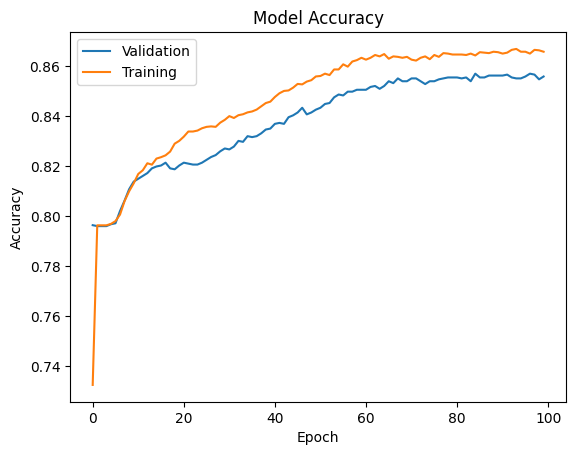

In [21]:
# List all data in history
print(model_history.history.keys())

# Summarize history for accuracy
plt.plot(model_history.history['val_accuracy'])  # Using 'val_accuracy' for validation accuracy
plt.plot(model_history.history['accuracy'])      # Using 'accuracy' for training accuracy
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Validation', 'Training'], loc='upper left')
plt.show()

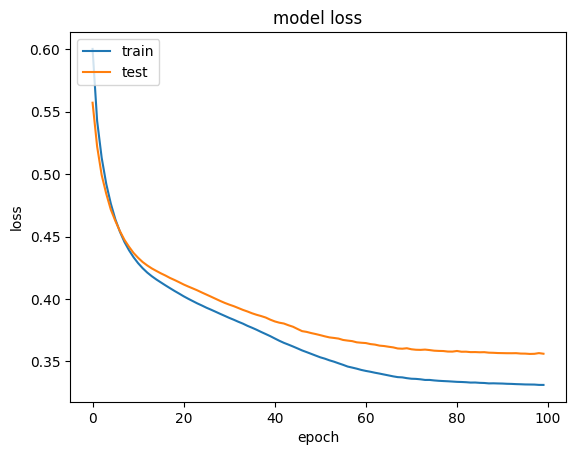

In [22]:
# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [23]:
# Part 3 - Making the predictions and evaluating the model

# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)


63/63 [==============================] - 0s 2ms/step


In [26]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[1509,   86],
       [ 191,  214]])

In [27]:
# Calculate the Accuracy
from sklearn.metrics import accuracy_score
score=accuracy_score(y_pred,y_test)
score

0.8615